In [9]:
import torch
import time

def test_precision_performance(device, dtype, matrix_size=1024, count=1):
    # 创建随机矩阵
    A = torch.randn(matrix_size, matrix_size, dtype=dtype, device=device)
    B = torch.randn(matrix_size, matrix_size, dtype=dtype, device=device)

    # 将其转移到GPU
    A = A.to(device)
    B = B.to(device)

    # 计算乘法的时间
    start_time = time.time()
    for i in range(count):
        B = torch.mm(A, B)  # 矩阵乘法
    torch.cuda.synchronize()  # 等待所有计算完成
    end_time = time.time()

    # 返回时间（秒）
    return end_time - start_time

# 实验设置
device_4090 = torch.device('cuda:0')  # 假设GPU 0是4090

# 测试单精度和双精度
for device, gpu_name in [(device_4090, '4090')]:
    print(f"\nTesting on {gpu_name}:")
    for dtype, precision in [(torch.float32, 'FP32'), (torch.float64, 'FP64')]:
        elapsed_time = test_precision_performance(device, dtype, count=10000)
        print(f"{precision}: {elapsed_time:.4f} seconds")


Testing on 4090:
FP32: 0.8916 seconds
FP64: 17.0369 seconds


In [34]:
interval_32 = [1, 10, 100, 1000, 10000]

In [35]:
elapsed_time_32 = []
for i in interval_32:
    elapsed_time_32.append(test_precision_performance(torch.device('cuda:0'), torch.float32, count=i))

print(elapsed_time_32)

[0.0014760494232177734, 0.016863584518432617, 0.08216643333435059, 0.2092576026916504, 0.7129697799682617]


In [36]:
interval_64 = [1, 10, 100, 1000, 2000]

In [37]:
elapsed_time_64 = []
for i in interval_64:
    elapsed_time_64.append(test_precision_performance(torch.device('cuda:0'), torch.float64, count=i))   
    
print(elapsed_time_64)

[0.0023200511932373047, 0.018072843551635742, 0.18163514137268066, 1.7942545413970947, 3.584594488143921]


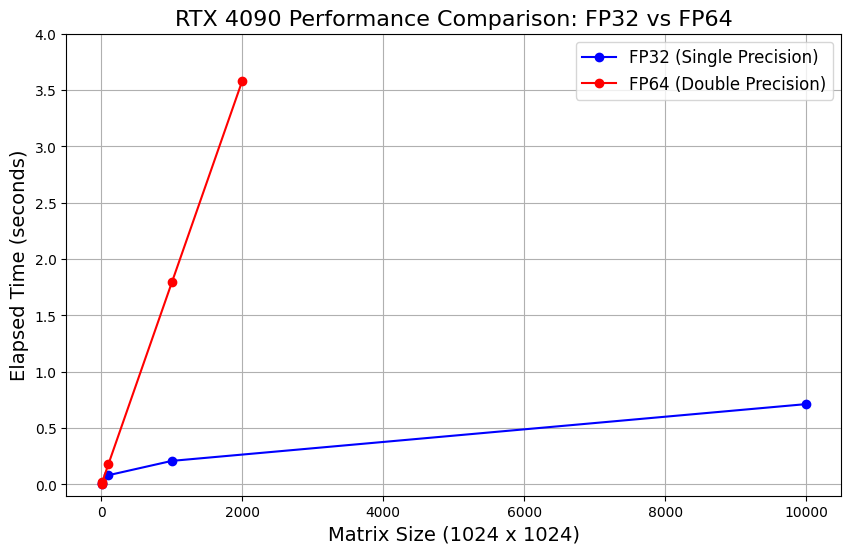

In [40]:
import matplotlib.pyplot as plt
# 绘图
plt.figure(figsize=(10, 6))
plt.plot(interval_32, elapsed_time_32, label='FP32 (Single Precision)', marker='o', color='blue')
plt.plot(interval_64, elapsed_time_64, label='FP64 (Double Precision)', marker='o', color='red')

# 添加图例、标题和轴标签
plt.title('RTX 4090 Performance Comparison: FP32 vs FP64', fontsize=16)
plt.xlabel('Matrix Size (1024 x 1024)', fontsize=14)
plt.ylabel('Elapsed Time (seconds)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
# 设置 y 轴范围为 0 到 4 秒
plt.ylim(-0.1, 4)
# 显示图
plt.show()

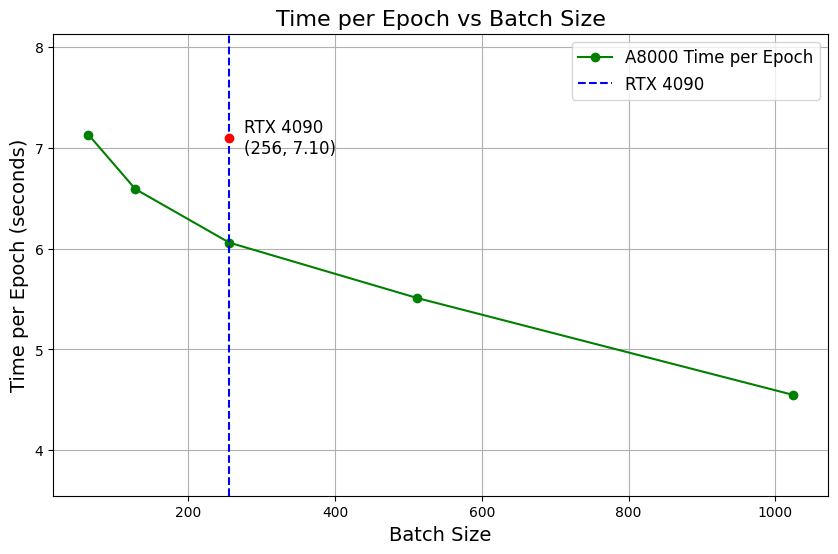

In [49]:
import matplotlib.pyplot as plt

# 数据
batchsize_interval = [64, 128, 256, 512, 1024]
A800_time_per_epoch = [7.13, 6.59, 6.059, 5.51, 4.55]

# 仅包含一个批次大小的 RTX 4090 数据
batchsize_4090 = [256]
rtx4090_time_per_epoch = [7.1]

# 绘制 A8000 的曲线
plt.figure(figsize=(10, 6))
plt.plot(batchsize_interval, A800_time_per_epoch, marker='o', color='green', label='A8000 Time per Epoch')

# 绘制 RTX 4090 的竖直线
plt.axvline(x=batchsize_4090[0], color='blue', linestyle='--', label='RTX 4090')

# 标注 RTX 4090 所在的点
plt.scatter(batchsize_4090, rtx4090_time_per_epoch, color='red', zorder=5)  # 红点表示 RTX 4090
plt.text(batchsize_4090[0]+20, rtx4090_time_per_epoch[0], f'RTX 4090\n({batchsize_4090[0]}, {rtx4090_time_per_epoch[0]:.2f})',
         color='black', fontsize=12, ha='left', va='center')

# 设置标题和轴标签
plt.title('Time per Epoch vs Batch Size', fontsize=16)
plt.xlabel('Batch Size', fontsize=14)
plt.ylabel('Time per Epoch (seconds)', fontsize=14)

# 设置y轴范围
plt.ylim(min(A800_time_per_epoch) - 1, max(A800_time_per_epoch) + 1)

# 设置x轴为对数刻度
# plt.xscale('log')

# 显示网格
plt.grid(True)

# 添加图例
plt.legend(fontsize=12)

# 显示图
plt.show()


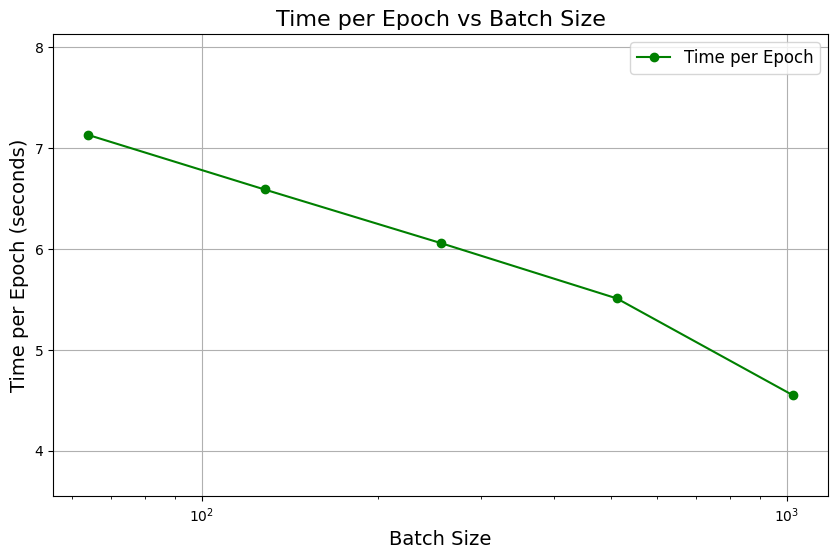

In [44]:
import matplotlib.pyplot as plt

# 数据
batchsize_interval = [64, 128, 256, 512, 1024]
time_per_epoch = [7.13, 6.59, 6.059, 5.51, 4.55]

# 绘制图
plt.figure(figsize=(10, 6))
plt.plot(batchsize_interval, time_per_epoch, marker='o', color='green', label='Time per Epoch')

# 设置标题和轴标签
plt.title('Time per Epoch vs Batch Size', fontsize=16)
plt.xlabel('Batch Size', fontsize=14)
plt.ylabel('Time per Epoch (seconds)', fontsize=14)

# 设置y轴范围
plt.ylim(min(time_per_epoch) - 1, max(time_per_epoch) + 1)

# 设置x轴为对数刻度（可选，通常处理大的batch size时更具可读性）
plt.xscale('log')

# 显示网格
plt.grid(True)

# 添加图例
plt.legend(fontsize=12)

# 显示图
plt.show()
